In [1]:
import pandas as pd
import matplotlib as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, multilabel_confusion_matrix
from yellowbrick.classifier import ROCAUC
from zipfile import ZipFile

Mount to drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Unxip the file from drive

In [3]:
natops_csv = "NATOPS_sid20-C_TRAIN_su.csv"
natops_zip = "/content/drive/MyDrive/NATOPS_sid20-C_TRAIN_su.csv.zip"
with ZipFile(natops_zip,"r") as zip:
    zip.extract(natops_csv)

Read the csv file and organize the data into x/y_test/train

In [ ]:
data = pd.read_csv(natops_csv).drop_duplicates()
features = [col for col in data.columns if "fea" in col]
x_train = data.loc[data["isTest"] == 0][features].reset_index(drop = True).to_numpy()
y_train = data.loc[data["isTest"] == 0]["class"].reset_index(drop = True).to_numpy()
x_test = data.loc[data["isTest"] == 1][features].reset_index(drop = True).to_numpy()
y_test = data.loc[data["isTest"] == 1]["class"].reset_index(drop = True).to_numpy()

Gaussian naive bayes classification

accuracy of test: 0.5944444444444444
accuracy of train: 0.6555555555555556
roc_auc score: 0.8759259259259259


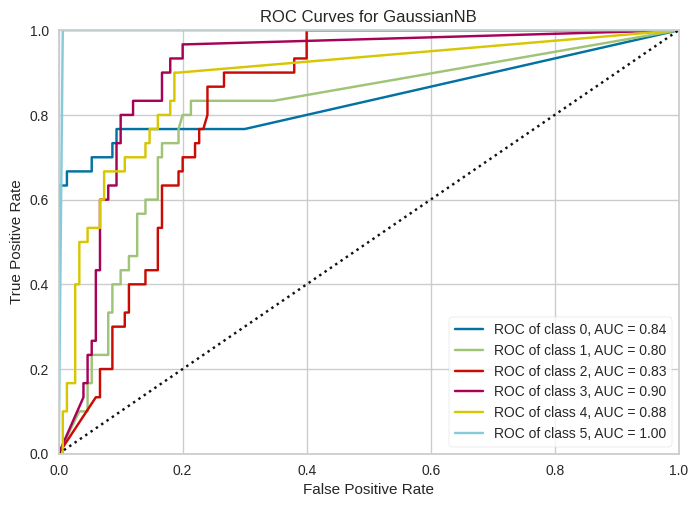

Class 0 recall: 0.6333333333333333
Class 0 precision: 1.0
Class 1 recall: 0.8333333333333334
Class 1 precision: 0.43103448275862066
Class 2 recall: 0.13333333333333333
Class 2 precision: 0.3076923076923077
Class 3 recall: 0.23333333333333334
Class 3 precision: 0.4666666666666667
Class 4 recall: 0.7333333333333333
Class 4 precision: 0.5
Class 5 recall: 1.0
Class 5 precision: 0.967741935483871


In [ ]:
gnbc = GaussianNB()

# fit the model using training data
gnbc.fit(x_train, y_train)

# make predictions on the test data
y_prediction = gnbc.predict(x_test)
y_prediction_train = gnbc.predict(x_train)

# compare the prediction with the actual results
accuracy = accuracy_score(y_test, y_prediction)
print("accuracy of test:", accuracy)
accuracy0 = accuracy_score(y_train, y_prediction_train)
print("accuracy of train:", accuracy0)

# calculate roc_auc score
y_score = gnbc.predict_proba(x_test)
roc = roc_auc_score(y_test, y_score, multi_class = "ovr")
print("roc_auc score:", roc)

# plot roc of each class
roc = ROCAUC(gnbc, macro = False, micro = False)
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

#confusion matrix
labels = [0, 1, 2, 3, 4, 5]
confusion_matrix = multilabel_confusion_matrix(y_test, y_prediction, labels=labels)
for x in range(6):
  tn, fp, fn, tp = confusion_matrix[x].ravel()
  recall = tp/(tp+fn)
  precision = tp/(tp+fp)
  print("Class", x, "recall:", recall)
  print("Class", x, "precision:", precision)


Logistic regression

accuracy of test: 0.7055555555555556
accuracy of train: 0.7611111111111111
roc_auc score: 0.9316666666666666


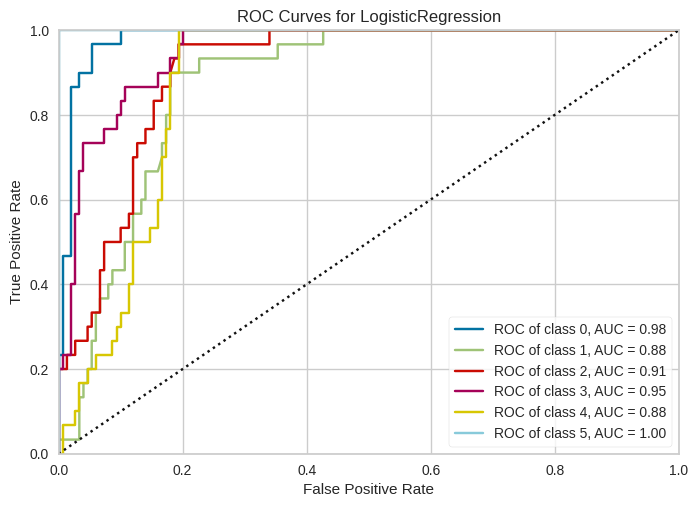

Class 0 recall: 0.8333333333333334
Class 0 precision: 0.8928571428571429
Class 1 recall: 0.6
Class 1 precision: 0.5
Class 2 recall: 0.5333333333333333
Class 2 precision: 0.6153846153846154
Class 3 recall: 0.6
Class 3 precision: 0.6428571428571429
Class 4 recall: 0.6666666666666666
Class 4 precision: 0.625
Class 5 recall: 1.0
Class 5 precision: 1.0


In [ ]:
lr = LogisticRegression()

# fit the model using training data
lr.fit(x_train, y_train)

# make predictions on the test data
y_prediction = lr.predict(x_test)
y_prediction_train = lr.predict(x_train)

# compare the prediction with the actual results
accuracy = accuracy_score(y_test, y_prediction)
print("accuracy of test:", accuracy)
accuracy0 = accuracy_score(y_train, y_prediction_train)
print("accuracy of train:", accuracy0)

# calculate roc_auc score
y_score = lr.predict_proba(x_test)
roc = roc_auc_score(y_test, y_score, multi_class = "ovr")
print("roc_auc score:", roc)

# plot roc of each class
roc = ROCAUC(lr, macro = False, micro = False)
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

#confusion matrix
labels = [0, 1, 2, 3, 4, 5]
confusion_matrix = multilabel_confusion_matrix(y_test, y_prediction, labels=labels)
for x in range(6):
  tn, fp, fn, tp = confusion_matrix[x].ravel()
  recall = tp/(tp+fn)
  precision = tp/(tp+fp)
  print("Class", x, "recall:", recall)
  print("Class", x, "precision:", precision)

K-nearest neighbor

accuracy of test: 0.6333333333333333
accuracy of train: 0.7777777777777778
roc_auc score: 0.9126481481481482


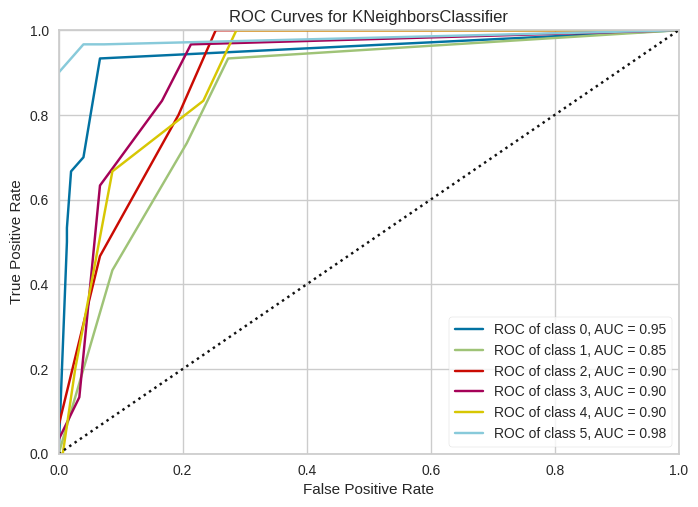

Class 0 recall: 0.7
Class 0 precision: 0.7777777777777778
Class 1 recall: 0.43333333333333335
Class 1 precision: 0.41935483870967744
Class 2 recall: 0.4666666666666667
Class 2 precision: 0.5833333333333334
Class 3 recall: 0.6333333333333333
Class 3 precision: 0.6551724137931034
Class 4 recall: 0.6666666666666666
Class 4 precision: 0.5128205128205128
Class 5 recall: 0.9
Class 5 precision: 0.9


In [ ]:
knn = KNeighborsClassifier()

# fit the model using training data
knn.fit(x_train, y_train)

# make predictions on the test data
y_prediction = knn.predict(x_test)
y_prediction_train = knn.predict(x_train)

# compare the prediction with the actual results
accuracy = accuracy_score(y_test, y_prediction)
print("accuracy of test:", accuracy)
accuracy0 = accuracy_score(y_train, y_prediction_train)
print("accuracy of train:", accuracy0)

# calculate roc_auc score
y_score = knn.predict_proba(x_test)
roc = roc_auc_score(y_test, y_score, multi_class = "ovr")
print("roc_auc score:", roc)

# plot roc of each class
roc = ROCAUC(knn, macro = False, micro = False)
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

#confusion matrix
labels = [0, 1, 2, 3, 4, 5]
confusion_matrix = multilabel_confusion_matrix(y_test, y_prediction, labels=labels)
for x in range(6):
  tn, fp, fn, tp = confusion_matrix[x].ravel()
  recall = tp/(tp+fn)
  precision = tp/(tp+fp)
  print("Class", x, "recall:", recall)
  print("Class", x, "precision:", precision)

Random forest classifier

accuracy of test: 0.6333333333333333
accuracy of train: 0.9888888888888889
roc_auc score: 0.9357777777777777


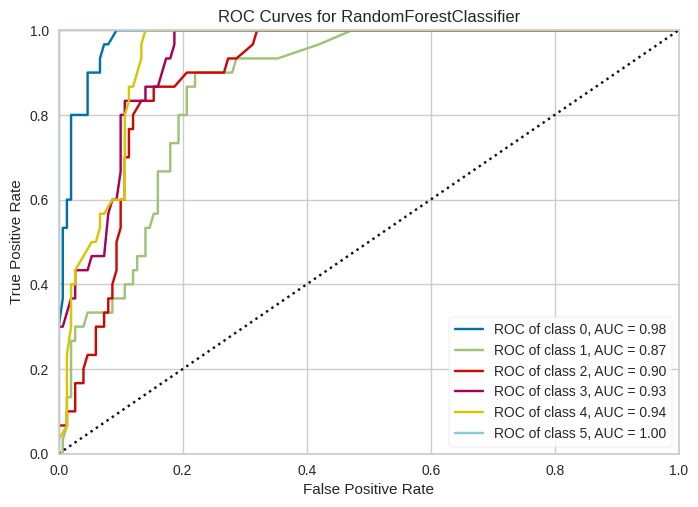

Class 0 recall: 0.8
Class 0 precision: 0.7741935483870968
Class 1 recall: 0.4
Class 1 precision: 0.4
Class 2 recall: 0.43333333333333335
Class 2 precision: 0.4642857142857143
Class 3 recall: 0.5666666666666667
Class 3 precision: 0.5862068965517241
Class 4 recall: 0.6
Class 4 precision: 0.5806451612903226
Class 5 recall: 1.0
Class 5 precision: 0.967741935483871


In [ ]:
rfc = RandomForestClassifier()

# fit the model using training data
rfc.fit(x_train, y_train)

# make predictions on the test data
y_prediction = rfc.predict(x_test)
y_prediction_train = rfc.predict(x_train)

# compare the prediction with the actual results
accuracy = accuracy_score(y_test, y_prediction)
print("accuracy of test:", accuracy)
accuracy0 = accuracy_score(y_train, y_prediction_train)
print("accuracy of train:", accuracy0)

# calculate roc_auc score
y_score = rfc.predict_proba(x_test)
roc = roc_auc_score(y_test, y_score, multi_class = "ovr")
print("roc_auc score:", roc)

# plot roc of each class
roc = ROCAUC(rfc, macro = False, micro = False)
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

#confusion matrix
labels = [0, 1, 2, 3, 4, 5]
confusion_matrix = multilabel_confusion_matrix(y_test, y_prediction, labels=labels)
for x in range(6):
  tn, fp, fn, tp = confusion_matrix[x].ravel()
  recall = tp/(tp+fn)
  precision = tp/(tp+fp)
  print("Class", x, "recall:", recall)
  print("Class", x, "precision:", precision)